### Importing Libraries

In [3]:
!pip install missingno

In [2]:
import numpy as np
import pandas as pd
import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

### Importing data

In [3]:
df = pd.read_csv('./Tamilnadu agriculture yield data.csv')
df.sample(3)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
1399,Tamil Nadu,DHARMAPURI,2004,Kharif,Castor seed,149,51.0
4569,Tamil Nadu,MADURAI,2004,Whole Year,Sweet potato,53,801.0
6875,Tamil Nadu,RAMANATHAPURAM,2010,Kharif,Maize,216,1178.0


### Checking missing values in chart

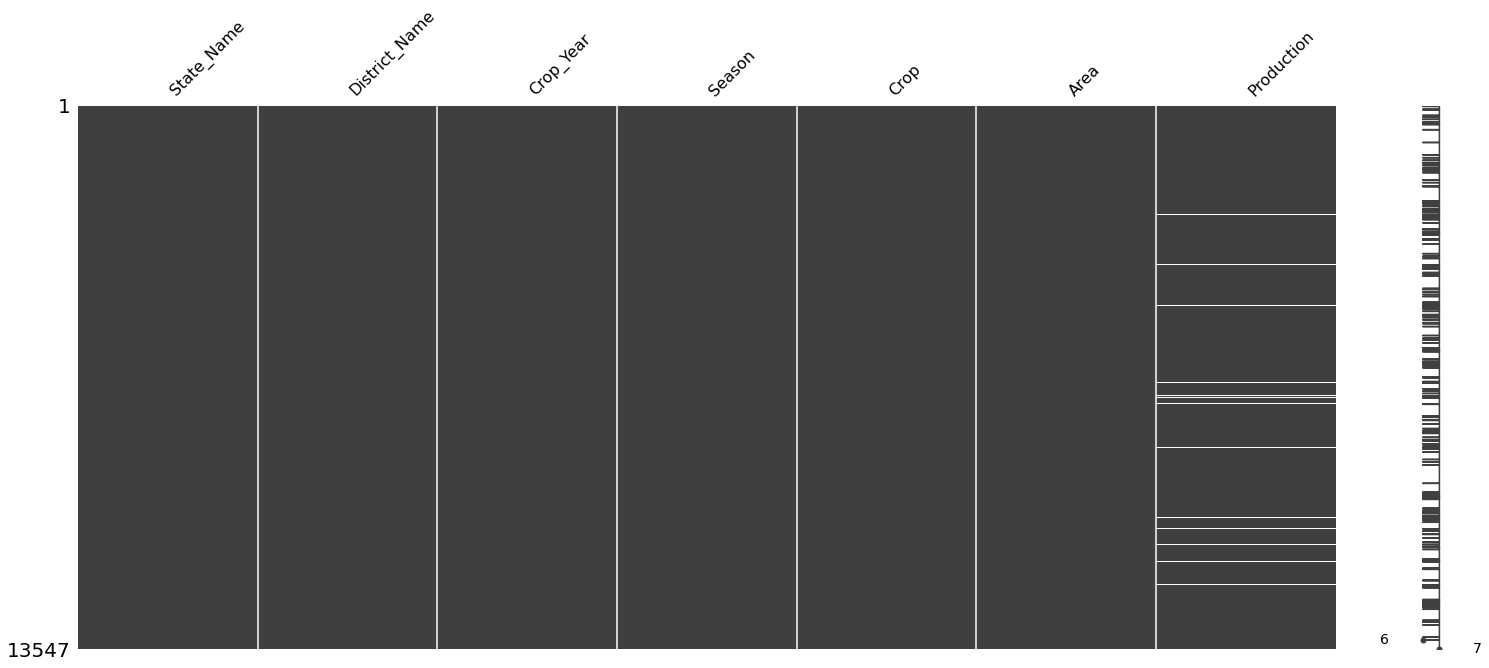

In [4]:
msno.matrix(df)
plt.show()

### Removing state_name from dada set and Removing emply values from dataset

In [5]:
df.drop('State_Name', axis=1,inplace=True)

In [6]:
df.dropna(how='any', inplace=True)

### Checking duplicates

In [7]:
print("Duplicates", len(df[df.duplicated()]))

Duplicates 0


### Converting district names to uppercase

In [8]:
df.District_Name = df.District_Name.apply(lambda x: x.capitalize())

### Agriculture affected from 1997-2013

In [9]:
grp = df.groupby("Crop_Year")["Area"].sum().sort_index(ascending=True)

In [10]:
ag_area = pd.DataFrame({'Year': grp.index, 'Agriculture Area': grp.values})
ag_area.head()

,Year,Agriculture Area
0,1997,9869675
1,1998,12253211
2,1999,6454851
3,2000,6298175
4,2001,4324672


In [18]:
fig = go.Figure(data = go.Scatter(x = ag_area['Year'], y = ag_area['Agriculture Area'], marker_color = ag_area['Agriculture Area']))
fig.update_layout(title='Agriculture area over the years', xaxis = dict(tickmode = 'linear', dtick = 1))
fig.show()

### Agriculture area in district for a particular year

In [20]:
grp_dist = df[df.Crop_Year == 1998].groupby("District_Name")["Area"].sum().sort_values(ascending = False)
dist_df = pd.DataFrame({'District': grp_dist.index, 'Agricultural Area': grp_dist.values})
dist_df.head()

,District,Agricultural Area
0,Dharmapuri,991139
1,Villupuram,875426
2,Tiruvannamalai,668226
3,Salem,649433
4,Cuddalore,596696


In [21]:
fig = px.bar(dist_df, x='District', y='Agricultural Area', color='Agricultural Area', height=600, width=1000, text='Agricultural Area', title='Agricultural Area in 1998')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

### Based on season

In [22]:
df.Season.value_counts()

Whole Year    7938
Kharif        4668
Rabi           660
Name: Season, dtype: int64

In [23]:
df.Crop.value_counts()

Groundnut            544
Cotton(lint)         510
Urad                 508
Moong(Green Gram)    497
Rice                 496
                    ... 
Plums                  6
Litchi                 6
Peach                  4
Apple                  4
Turnip                 2
Name: Crop, Length: 84, dtype: int64

In [30]:
se_crop = df.groupby(['Season', 'Crop'])['Production'].sum()
seas_crops = pd.DataFrame({'Production': se_crop}).reset_index()
seas_crops.head()

,Season,Crop,Production
0,Kharif,Arhar/Tur,421335.10
1,Kharif,Bajra,1642119.00
2,Kharif,Banana,2762324.00
3,Kharif,Castor seed,43901.53
4,Kharif,Cotton(lint),2922520.00


In [31]:
seas_crops.Season.value_counts()

Whole Year    77
Kharif        28
Rabi          16
Name: Season, dtype: int64

In [32]:
wy = seas_crops[seas_crops['Season'] == 'Whole Year']
nwy = seas_crops[seas_crops['Season'] != 'Whole Year']
nwy.head()

,Season,Crop,Production
0,Kharif,Arhar/Tur,421335.10
1,Kharif,Bajra,1642119.00
2,Kharif,Banana,2762324.00
3,Kharif,Castor seed,43901.53
4,Kharif,Cotton(lint),2922520.00


In [33]:
fig = px.sunburst(nwy, path=['Season', 'Crop'], values='Production')
fig.show()

In [34]:
fig = px.scatter(df, x="Production", y="Area",size="Crop_Year", color="Season", log_x=True, size_max=15, title = "Area and Production in each season")
fig.show()